In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
# Loading the data
raw_data = pd.read_csv('./Life expectancy.csv')
raw_data.head()

,Entity,Year,Life expectancy
0,Australia,1802,34.049999
1,Australia,1803,34.049999
2,Australia,1804,34.049999
3,Australia,1805,34.049999
4,Australia,1806,34.049999


## Here's the problem

This dataset lists the countries as a variable (Entity), so they are values on that column. A most appropriate way to organize the dataset is to have them as columns, and the year as the index, or a pseudo index. Let me show what I mean.

In [3]:
# First, let's get all the countries that are listed on the column Entity
raw_data['Entity'].unique()
#df[df['Entity'] == 'Australia']

array(['Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany',
       'India', 'Italy', 'Japan', 'Mexico', 'Russia', 'Spain',
       'Switzerland', 'United Kingdom', 'United States'], dtype=object)

In [4]:
columns = np.concatenate((np.array(['Year']), raw_data['Entity'].unique()))

df = pd.DataFrame(columns=columns, index=np.sort(raw_data['Year'].unique()))

df['Year'] = np.sort(raw_data['Year'].unique())

for country in raw_data['Entity'].unique():
    df[country] = raw_data[raw_data['Entity'] == country].drop(['Entity'], axis=1).set_index('Year').round(decimals=1)
df.reset_index(inplace=True, drop=True)
df.head()

,Year,Australia,Brazil,Canada,China,France,Germany,India,Italy,Japan,Mexico,Russia,Spain,Switzerland,United Kingdom,United States
0,1800,NaN,32.0,39.0,32.0,34.0,38.4,25.4,29.7,36.4,26.9,29.6,29.5,38.0,38.6,39.4
1,1801,NaN,32.0,39.0,32.0,36.4,38.4,25.4,29.7,36.4,26.9,29.6,29.5,38.0,37.4,39.4
2,1802,34.0,32.0,39.0,32.0,34.4,38.4,25.0,29.7,36.4,26.9,29.6,29.5,38.0,38.6,39.4
3,1803,34.0,32.0,39.0,32.0,30.6,38.4,24.0,29.7,36.4,26.9,29.6,29.5,38.0,37.3,39.4
4,1804,34.0,32.0,39.0,32.0,29.4,38.4,23.5,29.7,36.4,26.9,29.6,29.5,38.0,41.4,39.4


## Now we're talking

This dataset has separated the countries and assigned a value of life expectancy for each country according to the year. Now we can explore and plot the data.

In [5]:
# Let's check the statistics of the dataset
df.describe()

,Year,Australia,Brazil,Canada,China,France,Germany,India,Italy,Japan,Mexico,Russia,Spain,Switzerland,United Kingdom,United States
count,217.000000,215.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,1908.000000,54.272558,42.397696,55.778341,41.450691,53.693548,52.888940,34.282028,49.231336,50.341014,40.834562,42.000000,47.588479,55.244240,55.585253,54.646544
std,62.786676,17.906440,15.235851,15.288111,15.661498,15.981748,15.934556,14.655592,19.353290,17.695083,18.273781,17.522449,19.983739,16.446242,14.711754,15.122907
min,1800.000000,34.000000,27.000000,39.000000,22.400000,29.400000,29.000000,8.100000,25.600000,30.500000,18.200000,16.000000,29.500000,38.000000,37.300000,31.000000
25%,1854.000000,34.000000,32.000000,41.200000,32.000000,40.300000,38.400000,25.300000,29.700000,36.400000,26.900000,29.600000,29.500000,38.000000,41.700000,39.400000
50%,1908.000000,54.700000,32.000000,51.000000,32.000000,47.700000,44.500000,25.400000,43.500000,39.400000,28.700000,31.300000,39.800000,51.200000,50.400000,50.600000
75%,1962.000000,70.850000,55.600000,71.300000,50.500000,70.500000,70.000000,42.900000,69.300000,68.700000,58.200000,65.200000,69.700000,71.500000,70.900000,70.200000
max,2016.000000,82.600000,75.200000,81.800000,76.400000,82.300000,80.900000,68.600000,82.300000,83.900000,76.400000,70.900000,83.000000,83.200000,80.900000,79.000000


In [6]:
# Australia is the only one with two missing values, for the years of 1800 and 1801. Let's backfill those values:
df['Australia'].backfill(inplace=True)
df.head()

C:\Users\akhil\AppData\Local\Temp\ipykernel_20476\1062330456.py:2: FutureWarning: DataFrame.backfill/Series.backfill is deprecated. Use DataFrame.bfill/Series.bfill instead
  df['Australia'].backfill(inplace=True)


,Year,Australia,Brazil,Canada,China,France,Germany,India,Italy,Japan,Mexico,Russia,Spain,Switzerland,United Kingdom,United States
0,1800,34.0,32.0,39.0,32.0,34.0,38.4,25.4,29.7,36.4,26.9,29.6,29.5,38.0,38.6,39.4
1,1801,34.0,32.0,39.0,32.0,36.4,38.4,25.4,29.7,36.4,26.9,29.6,29.5,38.0,37.4,39.4
2,1802,34.0,32.0,39.0,32.0,34.4,38.4,25.0,29.7,36.4,26.9,29.6,29.5,38.0,38.6,39.4
3,1803,34.0,32.0,39.0,32.0,30.6,38.4,24.0,29.7,36.4,26.9,29.6,29.5,38.0,37.3,39.4
4,1804,34.0,32.0,39.0,32.0,29.4,38.4,23.5,29.7,36.4,26.9,29.6,29.5,38.0,41.4,39.4


## What can we do now?

* We can plot and see how the life expectancy evolved the last 200 years.
* Fitting a line doesn't make much sense because we would be predicting the future.
* Clustering the data could give us some insights, such as the difference of rich and poor countries, peaceful vs aggressive, northern hemisfere vs southern hemisfere, etc.

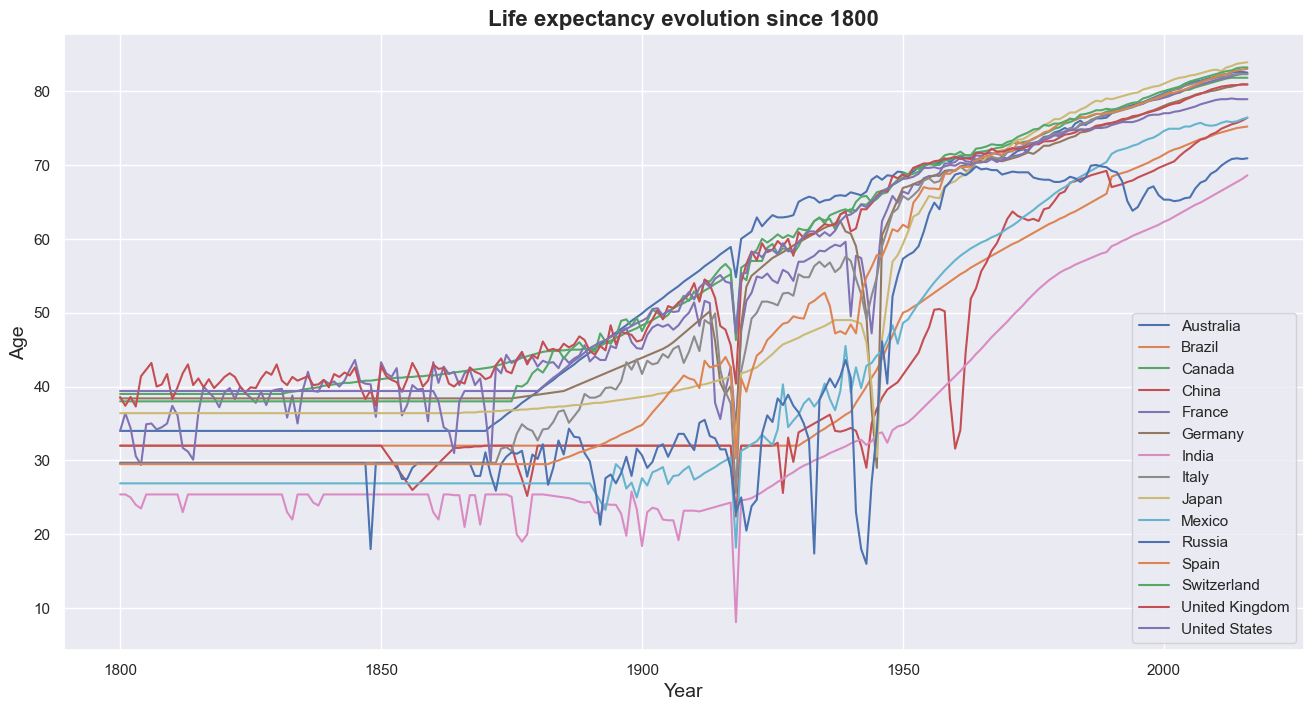

In [7]:
# Let's plot those lines
plt.figure(figsize=(16,8))
for country in df.columns.drop(['Year']):
    plt.plot(df['Year'], df[country])
plt.title("Life expectancy evolution since 1800", fontsize=16, fontweight="bold")
plt.ylabel("Age", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.legend(df.columns.drop(['Year']))
plt.show()

## What we be observed:

* Up until around 1875 there area straight lines for almost all countries, which probably means this data was generated.
* In general, the life expectancy has pretty much doubled, from a mean of 35 to a mean above 70.
* After 1900, some countries suffered huge drops of life expectancy in some periods. We'll try to understand why.

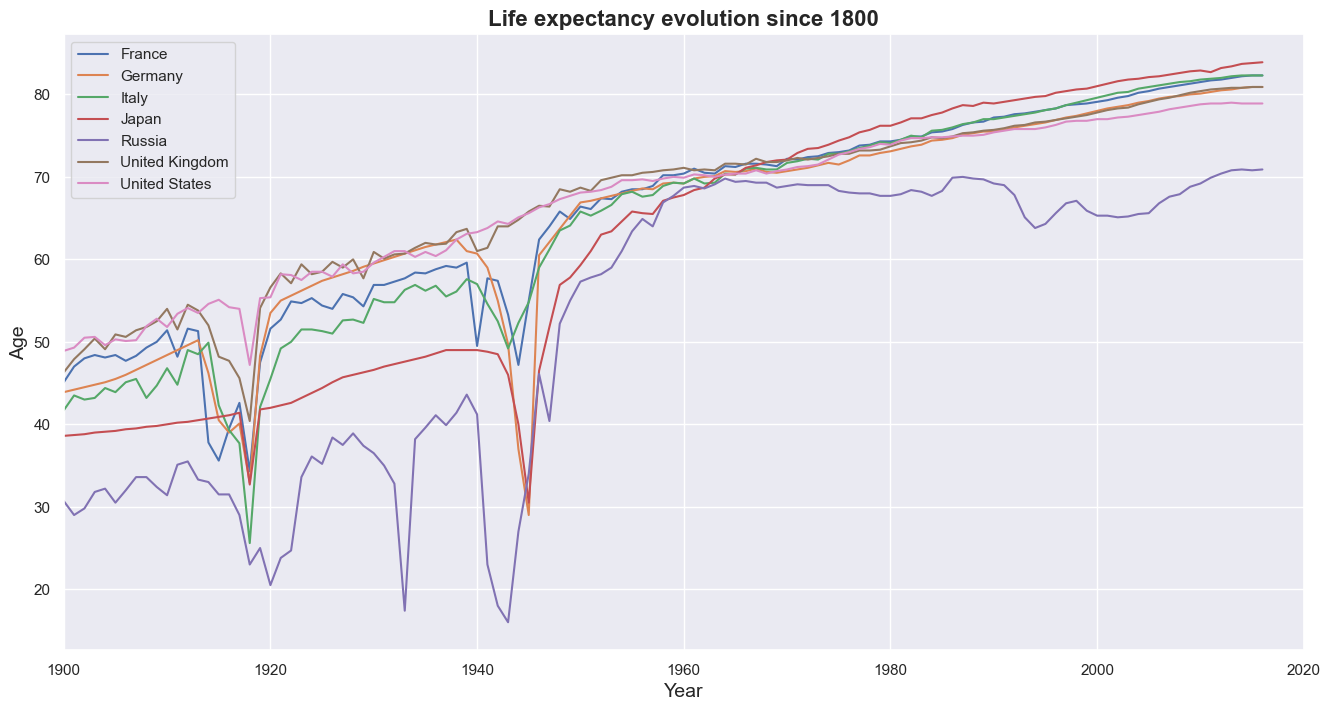

In [8]:
# Plotting the main countries that participated in World War I and World War II.
plt.figure(figsize=(16,8))
for country in ['France', 'Germany', 'Italy', 'Japan', 'Russia', 'United Kingdom', 'United States']:
    plt.plot(df['Year'], df[country])
plt.title("Life expectancy evolution since 1800", fontsize=16, fontweight="bold")
plt.ylabel("Age", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.xlim([1900, 2020])
plt.legend(['France', 'Germany', 'Italy', 'Japan', 'Russia', 'United Kingdom', 'United States'])
plt.show()

## As expected:

There are big drops around the periods of war: 1914 - 1918 and 1939 - 1945.

* For the period of World War II, the US and UK doesn't show significant drops, which seems strange to me.
* Russia is the one that suffered the most, counting more than 20 million deaths.
* Following the war, the Cold War period had combats that didn't kill nearly as many as the World War II, so we can observe a steady growth of the life expectancy.
